Adrian deCola

C Lab

PHYS 231

Due October 8, 2021   /  Checked October 13 -NL

In [ ]:
from google.colab import drive
from matplotlib import pyplot as plt
import statistics as stats
import numpy as np
import pandas as pd
import os
import re

In [ ]:
# Mounting the drive
drive.mount('/content/drive')
data_dir = "/content/drive/MyDrive/deCola/CAP Lab/Data/electronic_data" # might have to change this based on your directory organization

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Part 1: The Permittivity of Free Space
## Deriving an Expression for the Permittivity of Free Space, $\varepsilon_0$

We know that in an RC Circuit, the voltage across a discharging capacitor is $$V(t) = V_0e^{\frac{-t}{\tau}}$$ where $\tau = RC$ and $R$ is the resistance of the resistor in the circuit, and $C$ is the capacitance of the circuit. Paying attention to to the time constant equation we can substitute in the capacitance of our circuit. Since the oscilloscope measured the voltage across the capacitor, the two circuit capacitances were in parellel as shown in Figure 1.2. Since they are in parrellel we add them to get the circuit capacitance, $$C_{circuit} = C_{capacitor} + C_{internal}$$ Including the capacitance for a parrellel plate capacitance we get:
\begin{align}
C_{capacitor}&= \frac{\varepsilon_0A}{d} \\
\tau &= R \left(\frac{\varepsilon_0A}{d} + C_{int}\right)\\
\frac{\tau}{R} - C_{int} &= \frac{\varepsilon_0A}{d}\\
\varepsilon_0 &= \frac{d}{A}\left(\frac{\tau}{R} - C_{int}\right)
\end{align}
Where $A$ is the area of the parallel plate capacitor, $d$ is its separation distance, $R$ is the resistance of the resistor in ohms, $\tau$ is the time constant of the voltage decay of the capacitor, and $C_{int}$ is the internal capacitance of the oscilloscope. 



## Deriving $d$, the Seperation between the Parellel Plate Capacitors
    Note: All calculations will always be shown in a python cell below. 
To calculate $d$, we used the knob readings on the capacitor; there was three knobs. We could very accuratly turn the knob to the desired seperation; therefore all of our uncertainties came from trying to find the zero point on the knobs. The manual data sheet shows these measurements, which we did three times for each knob. We can average our readings for each knob to get the best value of the zero point for each knob, as all measurements had the same uncertainty. 
\begin{align}
d_{1,best} &= 17\\
d_{2,best} &= 4\\
d_{3,best} &= 2\\
\end{align}
To calculate the uncertainty in the zero point, and therefore the uncertainty in our seperation measurements, $d$:
$$\sigma_{d} =\left( \sqrt{\sum_i{\frac{1}{\sigma_i^2}}} \right)^{-2}$$
$$\sigma_{d} = 0.01mm$$
This value is the same for all of our knobs as each measurement had the same uncertainty, therefore this uncertainty is also used for the seperation uncertainty, $\sigma_{d}$.


In [ ]:
d_1_best = np.average([15, 18, 17])
d_2_best = np.average([2, 4, 5])
d_3_best = np.average([3, 2, 2])

sigma_d_in_tens_of_micrometers = (2**-2 + 2**-2 + 2**-2)**-.5
sigma_d_val = 10**(-5) * sigma_d_in_tens_of_micrometers

print(f"The best zero value for the first knob is {round(d_1_best)}.")
print(f"The best zero value for the second knob is {round(d_2_best)}.")
print(f"The best zero value for the third knob is {round(d_3_best)}.")

print(f"The uncertainty in our seperation values is {round(sigma_d_val * 10**3, 2)}mm.")

The best zero value for the first knob is 17.
The best zero value for the second knob is 4.
The best zero value for the third knob is 2.
The uncertainty in our seperation values is 0.01mm.


## Deriving $A$, the Area of the Parellel Plates
To calculate $A$, the we use the equation for an area of a circle knowing diameter, which we measured. 
$$A = \pi \left(\frac{D}{2}\right)^2$$
First we must calculate a value and uncertainty for the diameter measurements. To get a best value for these we can just take the average as the uncertainty in all the measurements is the same. This value is $24.94cm$. To get the uncertainty in this value we will use the following equation:
$$\sigma_{D} =\left( \sqrt{\sum_i{\frac{1}{\sigma_i^2}}} \right)^{-1}$$
$$\sigma_{D} = 0.01mm$$
Therefore $D = 24.90\pm0.06 cm$.


Calculating the best value for $A$, the area of the plate, we will use the best value for $D$, the diameter of the plate. This best area value is $48.7cm^2$. To calculate the uncertainty in this value we will use the following equation. 
\begin{align}
\sigma_A&=\sqrt{\sum_i\left(\frac{\partial A}{\partial p_i}\right)^2\sigma_{p_i}^2}\\
&=\sqrt{\left(\frac{\pi}{2}D\right)^2\sigma_{D}^2}\\
&=\frac{\pi}{2}D\sigma_{D}\\
\sigma_D&=0.09cm\\
\end{align}

Therefore $A=487.0\pm0.9cm^2$.

In [ ]:
D_cm = np.average([24.9, 24.9, 24.9])
D = D_cm * 10**-2

sigma_D_in_cm = (.1**-2 + .1**-2 + .1**-2 )**-.5
sigma_D = 10**-2 * sigma_D_in_cm

print(f"The best value for the diameter of the parellel plate is {round(D, 4)}m.")
print(f"The uncertainty in this value is {round(sigma_D, 4)}m.")

A_val = np.pi * (D / 2)**2

sigma_A_val = .5 * np.pi * sigma_D

print(f"The best value for the area is {round(A_val, 4)}m^2.")
print(f"The uncertainty in this value is {round(sigma_A_val, 4)}m^2.")

The best value for the diameter of the parellel plate is 0.249m.
The uncertainty in this value is 0.0006m.
The best value for the area is 0.0487m^2.
The uncertainty in this value is 0.0009m^2.


## Calculating $\tau$ from the Discharge of a Capacitor
As stated before, we know that in an RC Circuit, the voltage across a discharging capacitor is $$V(t) = V_0e^{\frac{-t}{\tau}}$$
Taking the log of each side we get $$ln(V_t)= ln(V_0) + \frac{-1}{\tau}t$$
Therefore, if we take the log of the voltage we would expect the slope values to be equal to $\frac{-1}{\tau}$ or $$\tau=\frac{-1}{m}$$where m is the slope. This slope can be derived from a linear regression of the log of the voltage and time. The slope value for a linear regression is in accordance with the equation (in all of these cases, $x$ will represent time and $y$ will represent voltage):
$$m = \frac{N\sum_i{x_iy_i}-\sum_i{x_i}
\sum_i{y_i}}{\Delta}$$
where $$\Delta=N\sum_i{x_i^2}-\left(\sum_i{x_i}\right)^2$$
Its uncertainty is in accordance with $$\sigma_m = \sqrt{\left(\frac{N}{\Delta}\right)\frac{1}{N-2}\sum_i{(y_i-mx_i-c)^2}}$$
where $c$ is the estimated intercept of the regression or $$c=\frac{\sum_ix_i^2\sum_iy_i-\sum_ix_i\sum_ix_iy_i}{\Delta}$$
We will use a built in numpy package to calculate $m$ and $c$, though these same equations are the ones applies and numpy also uses the lease squares estimator. Numpy does not have a way to get the errors in these estimates so we will have to calculate the error in the slope in accordance with the equation above. Once we have the error in the slope we can solve for the error in $\tau$:
\begin{align}
\sigma_{\tau}&=\sqrt{\sum_i\left(\frac{\partial \tau}{\partial p_i}\right)^2\sigma_{p_i}^2}\\
&= \frac{1}{m^2}\sigma_m
\end{align}
These are calculated using python below.

    The resistances and seperations are in the filenames. Each filename is of the form "CAP_[resistance in ohms]_[seperation in mm]". We will make arrays for all our relevant mesurements. 

In [ ]:
# creating empty lists for each
d = []
sigma_d = []
A = []
sigma_A = []
R = []
sigma_R = []
tau = []
sigma_tau = []

# maps resistancees to their tolerances/uncertainties
tolerance_R_dict = {10000:5, 91000:5, 150000:1, 300000:5, 510000:5, 1000000:5}

capacitor_data_dir = data_dir + "/Capacitor"

# navigating through data files
for filename in os.listdir(capacitor_data_dir):
  filename_list = filename.rsplit("_")

  R_val = int(filename_list[1]) * 10**3
  R.append(R_val)

  sigma_R_val = R_val * tolerance_R_dict[R_val] * 10**-2
  sigma_R.append(sigma_R_val)

  # in the naming commas meant periods, therefore grabbing the correct value, in milimeters
  d_val_mm = float(re.sub(",", ".", filename_list[2].strip(".csv")))
  d_val = 10**-3 * d_val_mm
  d.append(d_val)

  # same for all seperations, defined above
  sigma_d.append(sigma_d_val)

  # same for all experiments
  A.append(A_val)
  sigma_A.append(sigma_A_val)

  # reading the voltages and times into numpy arrays
  df = pd.read_csv(os.path.join(capacitor_data_dir, filename))
  times = df.iloc[:,0].values
  voltages = df.iloc[:,1].values
  log_voltages = np.log(voltages)

  slope, intercept = np.polyfit(times, log_voltages, 1)
  tau_val = -slope**-1
  tau.append(tau_val)
  
  # calculating the uncertainty in the slope
  Delta = len(times)*np.sum(times**2) - (np.sum(times))**2
  sigma_m = np.sqrt(len(times)/Delta/(len(times)-2)*np.sum((log_voltages-slope*times-intercept)**2))

  # calculating the uncertainty in the time constant
  sigma_tau_val = sigma_m / (slope)**2
  sigma_tau.append(sigma_tau_val)


## Calculating the Internal Capacitance of the Oscilloscope
Knowing the time constant is $$\tau = RC$$ and using an RC circuit that does not include our parrellel plate as shown in Figure 1.2., we can calculate the capacitance of the internal capacitance of the oscilloscope. In this case we can calculate $\tau$ using the same process as above, and then divide by $R$ to get the internal capacitance. $$C=\frac{\tau}{R}$$ To calculate the uncertainty in this value we will calculate the uncertainties in $\tau$ in the same way as above and use the tolerances for the uncertainty in the resistances. 
\begin{align}
\sigma_C&=\sqrt{\sum_i\left(\frac{\partial C}{\partial p_i}\right)^2\sigma_{p_i}^2}\\
&=\sqrt{\left(\frac{1}{R}\sigma_{\tau}\right)^2+\left(-\frac{\tau}{R^2}\sigma_R\right)^2}\\
\end{align}


In [ ]:
R_int = []
sigma_R_int = []
tau_int = []
sigma_tau_int = []


internal_capacitor_data_dir = data_dir + "/Internal"

# navigating through data files
for filename in os.listdir(internal_capacitor_data_dir):
  filename_list = filename.rsplit("_")

  R_int_val = int(filename_list[1]) * 10**3
  R_int.append(R_int_val)

  sigma_R_int_val = R_int_val * tolerance_R_dict[R_int_val] * 10**-2
  sigma_R_int.append(sigma_R_int_val)

  # reading the voltages and times into numpy arrays
  df = pd.read_csv(os.path.join(internal_capacitor_data_dir, filename))
  times = df.iloc[:,0].values
  voltages = df.iloc[:,1].values
  log_voltages = np.log(voltages)

  slope, intercept = np.polyfit(times, log_voltages, 1)
  tau_int_val = -slope**-1
  tau_int.append(tau_int_val)
  
  # calculating the uncertainty in the slope
  Delta = len(times)*np.sum(times**2) - (np.sum(times))**2
  sigma_m = np.sqrt(len(times)/Delta/(len(times)-2)*np.sum((log_voltages-slope*times-intercept)**2))

  # calculating the uncertainty in the time constant
  sigma_tau_int_val = sigma_m / (slope)**2
  sigma_tau_int.append(sigma_tau_int_val)

# creating numpy arrays for our list for arithmetic 
R_int = np.asarray(R_int)
sigma_R_int = np.asarray(sigma_R_int)
tau_int = np.asarray(tau_int)
sigma_tau_int = np.asarray(sigma_tau_int)

# calculating the capacitance and uncertainty
C_int = tau_int/R_int
sigma_C_int = np.sqrt((sigma_tau_int/R_int)**2 + (-tau_int*sigma_R_int/R_int**2)**2)


To get a best value and uncertainty for the internal capacitance we will use the typical method of weighting each value by their uncertainty as shown in the equation below:
 $$C_{int} = \frac{\sum_i\frac{C_{int,i}}{\sigma_{C_{int,i}}^2}}{\sum_i\frac{1}{\sigma_{C_{int,i}}^2}}$$
 With an uncertainty according to the following equation:
 $$\sigma_{C_{int,i}} = \left( \sqrt{\sum_i\frac{1}{\sigma_{C_{int,i}}^2}}\right)^{-1}$$


In [ ]:
C_int_best = (np.sum(C_int/sigma_C_int**2))/(np.sum(1/sigma_C_int**2))
C_int_unc = (np.sum(1/sigma_C_int**2))**-.5

print(f"The calculated internal capacitance is {round(C_int_best, 13)}F.")
print(f"The uncertainty in this value is {round(C_int_unc, 13)}F.")

The calculated internal capacitance is 1.51e-11F.
The uncertainty in this value is 4e-13F.


The value of the internal capacitance is $$C_{int} = (1.51\pm0.04)*10^{-11}F$$

## Calculating Values for the Permittivity of Free Space
We will now calculate values for the permittivity of free space, in accordance with the equation above and graph them:
$$\varepsilon_0 = \frac{d}{A}\left(\frac{\tau}{R} - C_{int}\right)$$
To calculate the uncertainty in these values we will use the following equation:
\begin{align}
\sigma_{\varepsilon_0}&=\sqrt{\sum_i \left( \frac{\partial \varepsilon_0}{\partial p_i}\right)^2\sigma_{p_i}}\\
\sigma_{\varepsilon_0}&=\sqrt{\left(\frac{1}{A}\left(\frac{\tau}{R}-C_{int}\right)\sigma_d\right)^2 + \left(-\frac{d}{A^2}\left(\frac{\tau}{R}-C_{int}\right)\sigma_A\right)^2 + \left(\frac{d}{AR}\sigma_{\tau}\right)^2 + \left(-\frac{d\tau}{AR^2}\sigma_R\right)^2 + \left(-\frac{d}{A}\sigma_{C_{int}}\right)^2}
\end{align}



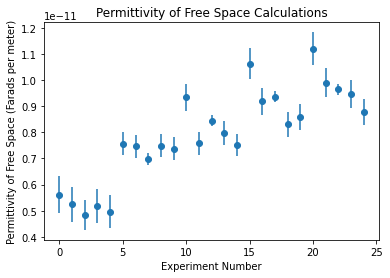

[7.15485588e-13 6.69097760e-13 5.67533747e-13 6.58112280e-13
 6.32398883e-13 4.46394713e-13 4.41335502e-13 2.19915056e-13
 4.41948163e-13 4.35124583e-13 5.27027353e-13 4.28652795e-13
 2.05245728e-13 4.50237654e-13 4.24826921e-13 5.94459752e-13
 5.16871332e-13 2.13313251e-13 4.69703531e-13 4.84872440e-13
 6.30385502e-13 5.60675861e-13 2.15029840e-13 5.37791449e-13
 5.00651277e-13]
[2.55679699e-08 4.94563093e-07 1.13057762e-06 9.17875259e-07
 1.94427400e-06 1.49443521e-08 1.18131678e-07 2.93990338e-07
 2.91875184e-07 4.77145761e-07 2.76407693e-08 1.03345579e-07
 7.41367476e-08 1.94901203e-07 5.05718222e-07 4.00451065e-09
 3.97157271e-08 3.44424656e-08 1.88282615e-07 1.60888572e-07
 4.89679243e-09 1.24573426e-08 3.26774947e-08 4.33697093e-08
 1.54951071e-07]
[4.35445718e-13 4.35445718e-13 4.35445718e-13 4.35445718e-13
 4.35445718e-13 4.35445718e-13 4.35445718e-13 4.35445718e-13
 4.35445718e-13 4.35445718e-13 4.35445718e-13 4.35445718e-13
 4.35445718e-13 4.35445718e-13 4.35445718e-13 4.354

In [ ]:
# creating numpy arrays for our calculated internal capacitance and its uncertainty
C_int = np.asarray([C_int_best for i in range(len(d))])
sigma_C_int = np.asarray([C_int_unc for i in range(len(d))])

# converting our list into numpy arrays for arithmetic 
d = np.asarray(d)
sigma_d = np.asarray(sigma_d)
A = np.asarray(A)
sigma_A = np.asarray(sigma_A)
R = np.asarray(R)
sigma_R = np.asarray(sigma_R)
tau = np.asarray(tau)
sigma_tau = np.asarray(sigma_tau)

perm = d/A*(tau/R-C_int)
sigma_perm = np.sqrt(((tau/R-C_int)/A*sigma_d)**2 + (d/A**2*(tau/R-C_int)*sigma_A)**2 + (d*sigma_tau/(A*R))**2 + (d*tau*sigma_R/(A*R**2))**2 + (d/A*sigma_C_int)**2)

# graphing 
trail = np.asarray([i for i in range(len(d))])

plt.scatter(trail, perm)
plt.errorbar(trail, perm, yerr=sigma_perm, linestyle = '')

plt.title("Permittivity of Free Space Calculations")
plt.xlabel("Experiment Number")
plt.ylabel("Permittivity of Free Space (Farads per meter)")

plt.show()

## Calculating a Weighted Average for $\varepsilon_0$
To get a best value and uncertainty for the permittivity we will use the typical method of weighting each value by their uncertainty as shown in the equation below:
 $$\varepsilon_0 = \frac{\sum_i\frac{\varepsilon_0}{\sigma_{\varepsilon_0}^2}}{\sum_i\frac{1}{\sigma_{\varepsilon_0}^2}}$$
 With an uncertainty according to the following equation:
 $$\sigma_{\varepsilon_0} = \left( \sqrt{\sum_i\frac{1}{\sigma_{\varepsilon_0}^2}}\right)^{-1}$$

In [ ]:
perm_best = (np.sum(perm/sigma_perm**2))/(np.sum(1/sigma_perm**2))
perm_unc = (np.sum(1/sigma_perm**2))**-.5

print(f"The permittivity of free space is {round(perm_best, 13)}F/m.")
print(f"The uncertainty in this value is {round(perm_unc, 13)}F/m.")

The calculated internal capacitance is 8.3e-12F.
The uncertainty in this value is 1e-13F.


The weighted average value of the permittivity of free space is $$\varepsilon_0= (8.3\pm0.1)*10^{-12}\frac{F}{m}$$

## Calculating a Value for $\varepsilon_0$ using the Spread Method


In [ ]:
perm_mean = stats.mean(perm)
perm_err = stats.stdev(perm) / np.sqrt(len(perm))

print(f"The permittivity of free space using the spread method is {round(perm_mean, 13)}F/m with an uncertainty in this value of {round(perm_err, 13)}F/m.")

The permittivity of free space using the spread method is 7.9e-12F/m with an uncertainty in this value of 4e-13F/m.


The spead value for the permittivity of free space is $$\varepsilon_0= (7.9\pm0.4)*10^{-12}\frac{F}{m}$$

# Part 2: The Dielectric Constant of the Plastic Sheets
## Deriving an Expression for Dielectric Constant of the Plastic Sheets, $\kappa_P$
We know that 
\begin{align}
\tau &= RC_{circuit}\\
\frac{\tau}{R} &= \frac{\kappa_P\varepsilon_0A}{d} + C_{int}
\frac{\tau}{R} - C_{int}&= \frac{\kappa_P\varepsilon_0A}{d} \\
\kappa_P &= \frac{d}{\varepsilon_0A}\left( \frac{\tau}{R}-C_{int}\right)
\end{align}
Calculating the uncertainty we will use th foloowing equation:
\begin{align}
\sigma_{\kappa_P}&=\sqrt{\sum_i \left( \frac{\partial \kappa_P}{\partial p_i}\right)^2\sigma_{p_i}}\\
\sigma_{\kappa_P}&=\sqrt{\left(\frac{1}{\varepsilon_0A}\left(\frac{\tau}{R}-C_{int}\right)\sigma_d\right)^2 + \left(-\frac{d}{\varepsilon_0A^2}\left(\frac{\tau}{R}-C_{int}\right)\sigma_A\right)^2 + \left(\frac{d}{\varepsilon_0AR}\sigma_{\tau}\right)^2 + \left(-\frac{d\tau}{\varepsilon_0AR^2}\sigma_R\right)^2 + \left(-\frac{d}{\varepsilon_0A}\sigma_{C_{int}}\right)^2}
\end{align}
All of these values will be calculated in the same way as before. The internal capacitance, seperation uncertainty, parellel plate area, and its uncertainty remain the same and the true value of the permittivity of free space will be used. 

## Deriving the Thickness of a Sheet of Plastic
The thickness of a sheet of plastic is $$T_{ps}=\frac{T}{S}$$where $T$ is the measured thickness of the sheets and $S$ is the number of sheets, which we were certain about. 

The following equation gives its uncertainty:
\begin{align}
\sigma_{T_{ps}}&=\sqrt{\sum_i\left(\frac{\partial T_{ps}}{\partial p_i}\right)^2\sigma_{p_i}^2}\\
\sigma_{T_{ps}}&=\frac{\sigma_T}{S}
\end{align}

Multiples of sheets means that the parellel plate seperation is the number of sheets times the thickness per sheet and its uncertainty value is the uncertainty in the thickness of one sheet time the number of sheets. 


In [ ]:
# creating them and numpy arrays
T_ps = np.asarray([.00133/10, .00204/15])
sigma_T_ps = np.asarray([.00005/10, .00005/15])

To get a best value and uncertainty for the thickness for one sheet we will use the typical method of weighting each value by their uncertainty as shown in the equation below:
 $$T_{ps} = \frac{\sum_i\frac{T_{ps,i}}{\sigma_{T_{ps,i}}^2}}{\sum_i\frac{1}{\sigma_{T_{ps,i}}^2}}$$
 With an uncertainty according to the following equation:
 $$\sigma_{T_{ps,i}} = \left( \sqrt{\sum_i\frac{1}{\sigma_{T_{ps,i}}^2}}\right)^{-1}$$

In [ ]:
T_ps_best = (np.sum(T_ps/sigma_T_ps**2))/(np.sum(1/sigma_T_ps**2))
T_ps_unc = (np.sum(1/sigma_T_ps**2))**-.5

print(f"The calculated thickness per sheet is {round(T_ps_best, 6)}m.")
print(f"The uncertainty in this value is {round(T_ps_unc, 6)}m.")

The calculated thickness per sheet is 0.000135m.
The uncertainty in this value is 3e-06m.


## Calculating Values for the Dielectric Constant of the Plastic Sheets
       Note: The resistances and the number of sheets are in the filenames. Each filename is of the form "CAP_[resistance in ohms]_[number of sheets]". We will make arrays for all our relevant mesurements. 

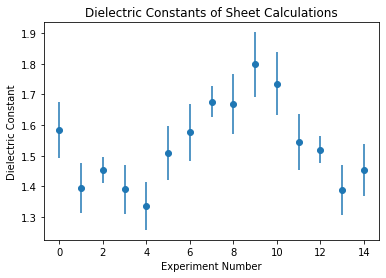

In [ ]:
# defining the true permittivity of free space
epsilon_val = 8.854188 * 10**-12

# creating empty lists for each
d = []
sigma_d = []
A = []
sigma_A = []
R = []
sigma_R = []
tau = []
sigma_tau = []

capacitor_plastic_data_dir = data_dir + "/Capacitor_for_plastic"

# navigating through data files
for filename in os.listdir(capacitor_plastic_data_dir):
  filename_list = filename.rsplit("_")

  R_val = int(filename_list[1]) * 10**3
  R.append(R_val)

  sigma_R_val = R_val * tolerance_R_dict[R_val] * 10**-2
  sigma_R.append(sigma_R_val)

  # same for all experiments
  A.append(A_val)
  sigma_A.append(sigma_A_val)

  # in the naming commas meant periods, therefore grabbing the correct value for the number of sheets
  sheets = int(re.sub(",", ".", filename_list[2].strip(".csv")))
  d_val = T_ps_best * sheets
  d.append(d_val)

  sigma_d_val = T_ps_unc * sheets
  sigma_d.append(sigma_d_val)

  # reading the voltages and times into numpy arrays
  df = pd.read_csv(os.path.join(capacitor_plastic_data_dir, filename))
  times = df.iloc[:,0].values
  voltages = df.iloc[:,1].values
  log_voltages = np.log(voltages)

  slope, intercept = np.polyfit(times, log_voltages, 1)
  tau_val = -slope**-1
  tau.append(tau_val)
  
  # calculating the uncertainty in the slope
  Delta = len(times)*np.sum(times**2) - (np.sum(times))**2
  sigma_m = np.sqrt(len(times)/Delta/(len(times)-2)*np.sum((log_voltages-slope*times-intercept)**2))

  # calculating the uncertainty in the time constant
  sigma_tau_val = sigma_m / (slope)**2
  sigma_tau.append(sigma_tau_val)

# creating numpy arrays for our calculated internal capacitance and its uncertainty
C_int = np.asarray([C_int_best for i in range(len(d))])
sigma_C_int = np.asarray([C_int_unc for i in range(len(d))])

# converting our list into numpy arrays for arithmetic 
d = np.asarray(d)
sigma_d = np.asarray(sigma_d)
A = np.asarray(A)
sigma_A = np.asarray(sigma_A)
R = np.asarray(R)
sigma_R = np.asarray(sigma_R)
tau = np.asarray(tau)
sigma_tau = np.asarray(sigma_tau)

epsilon = np.asarray([epsilon_val for i in range(len(d))])

kappa = d/(epsilon*A)*(tau/R-C_int)
sigma_kappa = np.sqrt(((tau/R-C_int)/(A*epsilon)*sigma_d)**2 + (d/(epsilon*A**2)*(tau/R-C_int)*sigma_A)**2 + (d*sigma_tau/(epsilon*A*R))**2 + (d*tau*sigma_R/(epsilon*A*R**2))**2 + (d/(epsilon*A)*sigma_C_int)**2)

# graphing 
trail = np.asarray([i for i in range(len(d))])

plt.scatter(trail, kappa)
plt.errorbar(trail, kappa, yerr=sigma_kappa, linestyle = '')

plt.title("Dielectric Constants of Sheet Calculations")
plt.xlabel("Experiment Number")
plt.ylabel("Dielectric Constant")

plt.show()


## Calculating a Weighted Average for $\kappa_P$
To get a best value and uncertainty for the dielectric we will use the typical method of weighting each value by their uncertainty as shown in the equation below:
 $$\kappa_P = \frac{\sum_i\frac{\kappa_P}{\sigma_{\kappa_P}^2}}{\sum_i\frac{1}{\sigma_{\kappa_P}^2}}$$
 With an uncertainty according to the following equation:
 $$\sigma_{\kappa_P} = \left( \sqrt{\sum_i\frac{1}{\sigma_{\kappa_P}^2}}\right)^{-1}$$

In [ ]:
diele_best = (np.sum(kappa/sigma_kappa**2))/(np.sum(1/sigma_kappa**2))
diele_unc = (np.sum(1/sigma_kappa**2))**-.5

print(f"The value for the dielectric constand of the sheets is {round(diele_best, 2)}.")
print(f"The uncertainty in this value is {round(diele_unc, 2)}.")

The value for the dielectric constand of the sheets is 1.52.
The uncertainty in this value is 0.02.


The weighted average for the dielectric constant is $$\kappa_P= 1.52\pm0.02$$

## Calculating a Value for $\kappa_P$ using the Spread Method

In [ ]:
diele_mean = stats.mean(kappa)
diele_err = stats.stdev(kappa) / np.sqrt(len(kappa))

print(f"The dielectric constant value using the spread method is {round(diele_mean, 2)} with an uncertainty in this value of {round(diele_err, 2)}.")

The dielectric constant value using the spread method is 1.54 with an uncertainty in this value of 0.04.


The weighted average for the dielectric constant is $$\kappa_P= 1.54\pm0.04$$